In [26]:
import pandas as pd
import numpy as np


In [27]:
df=pd.read_csv(r"C:\Summer_Projects\Healthcare\Heathcare_Los\archive (11)\LengthOfStay.csv")

In [28]:
print(df.head())

   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [29]:
print(df.tail())

          eid       vdate rcount gender  dialysisrenalendstage  asthma  \
99995   99996   1/28/2012      3      M                      0       0   
99996   99997    8/6/2012      0      M                      0       0   
99997   99998   7/23/2012      1      M                      0       0   
99998   99999  12/19/2012      0      M                      0       0   
99999  100000    3/6/2012      0      F                      0       0   

       irondef  pneum  substancedependence  psychologicaldisordermajor  ...  \
99995        0      0                    0                           0  ...   
99996        0      0                    0                           0  ...   
99997        1      0                    0                           0  ...   
99998        0      0                    0                           0  ...   
99999        0      0                    0                           0  ...   

          glucose  bloodureanitro  creatinine        bmi  pulse  respiration  \


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [31]:
print(df.columns.tolist())

['eid', 'vdate', 'rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'discharged', 'facid', 'lengthofstay']


### Dropping unnecessary or leaky columns:
- `eid`: ID column, not useful for modeling
- `vdate`: Visit date, could cause overfitting
- `discharged`: Target leakage (related to outcome)

In [32]:
columns_to_drop = ['eid', 'vdate', 'discharged']
df = df.drop(columns=columns_to_drop)


In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   rcount                      100000 non-null  object 
 1   gender                      100000 non-null  object 
 2   dialysisrenalendstage       100000 non-null  int64  
 3   asthma                      100000 non-null  int64  
 4   irondef                     100000 non-null  int64  
 5   pneum                       100000 non-null  int64  
 6   substancedependence         100000 non-null  int64  
 7   psychologicaldisordermajor  100000 non-null  int64  
 8   depress                     100000 non-null  int64  
 9   psychother                  100000 non-null  int64  
 10  fibrosisandother            100000 non-null  int64  
 11  malnutrition                100000 non-null  int64  
 12  hemo                        100000 non-null  int64  
 13  hematocrit     

### Creating `issue_score` Feature

We are combining multiple binary health condition columns into a single `issue_score` feature.

- Each column (like `asthma`, `irondef`, `pneum`, etc.) represents the presence (1) or absence (0) of a specific issue.
- By summing these columns row-wise, we get a total count of issues per patient.
- This helps simplify the model and reduce dimensionality while still capturing health complexity.
- The original columns are then dropped to avoid redundancy.



In [34]:
issue_score=['asthma', 'irondef', 'pneum', 'substancedependence',
    'psychologicaldisordermajor', 'depress', 'psychother',
    'fibrosisandother', 'malnutrition', 'hemo']
df['issue_score']=df[issue_score].sum(axis=1)
df.drop(columns=issue_score, inplace=True)

### Correlation with Length of Stay

This block calculates how strongly each numeric feature is correlated with the target variable `lengthofstay`.

- Only numeric (`int64`, `float64`) columns are included.
- Correlation helps identify which features may influence the hospital stay duration.
- The output is sorted to easily spot the most positively/negatively correlated variables.


In [35]:
num_row=df.select_dtypes(include=['int64','float64']).columns
cor_matrix=df[num_row].corr()['lengthofstay'].sort_values(ascending=False)
print(cor_matrix)

lengthofstay                 1.000000
issue_score                  0.413216
dialysisrenalendstage        0.169695
bloodureanitro               0.148290
pulse                        0.006683
secondarydiagnosisnonicd9    0.006540
bmi                          0.000132
glucose                     -0.003447
sodium                      -0.003546
creatinine                  -0.004026
neutrophils                 -0.010658
respiration                 -0.022291
hematocrit                  -0.064016
Name: lengthofstay, dtype: float64


### Dropping Low-Correlation Features

The following columns were dropped because they have very weak correlation (|r| < 0.07) with `lengthofstay`:

- `bmi`, `glucose`, `sodium`, `creatinine`, `neutrophils`, `respiration`, `hematocrit`

These features are unlikely to help the model make accurate predictions and may introduce noise or overfitting.

In [36]:
drop_columns=['bmi', 'glucose', 'sodium', 'creatinine',
    'neutrophils', 'respiration', 'hematocrit']
df=df.drop(columns=drop_columns)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   rcount                     100000 non-null  object 
 1   gender                     100000 non-null  object 
 2   dialysisrenalendstage      100000 non-null  int64  
 3   bloodureanitro             100000 non-null  float64
 4   pulse                      100000 non-null  int64  
 5   secondarydiagnosisnonicd9  100000 non-null  int64  
 6   facid                      100000 non-null  object 
 7   lengthofstay               100000 non-null  int64  
 8   issue_score                100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB
None


In [37]:
df['rcount']=df['rcount'].replace("5+",5).astype(int)

### Categorical Encoding

The columns `gender` and `facid` are categorical, so we apply **One-Hot Encoding** using `category_encoders`.  
This converts each category into binary columns, making them suitable for machine learning models.  
We use `use_cat_names=True` to keep column names readable .


In [38]:
import category_encoders as ce

# One-hot encode both 'gender' and 'facid' at once
encoder = ce.OneHotEncoder(cols=['gender', 'facid'], use_cat_names=True)
df = encoder.fit_transform(df)
print(df.tail())

       rcount  gender_F  gender_M  dialysisrenalendstage  bloodureanitro  \
99995       3         0         1                      0            12.0   
99996       0         0         1                      0            12.0   
99997       1         0         1                      0            12.0   
99998       0         0         1                      0            16.0   
99999       0         1         0                      0            12.0   

       pulse  secondarydiagnosisnonicd9  facid_B  facid_A  facid_E  facid_D  \
99995     80                          1        1        0        0        0   
99996     61                          1        1        0        0        0   
99997     61                          1        0        0        0        0   
99998     59                          1        1        0        0        0   
99999     74                          4        1        0        0        0   

       facid_C  lengthofstay  issue_score  
99995        0          

###  Train-Test Split

We split the dataset into features (`x`) and target (`y = lengthofstay`).  
Then, we use `train_test_split` to divide the data:
- 80% for training and 20% for testing
- `random_state=42` ensures reproducibility


In [39]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['lengthofstay'])
y=df['lengthofstay']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
print(df.issue_score)

0        0
1        0
2        0
3        0
4        2
        ..
99995    0
99996    0
99997    1
99998    1
99999    0
Name: issue_score, Length: 100000, dtype: int64


### Feature Scaling with StandardScaler

- Selected only numeric columns for scaling.
- Used `StandardScaler` to normalize these features (mean = 0, std = 1) to improve model performance.
- Transformed both training and test sets, using `.fit_transform()` on train and `.transform()` on test.
- Recombined scaled numeric features with unscaled categorical (e.g., one-hot encoded) features to form final datasets.


In [41]:
from sklearn.preprocessing import StandardScaler

# Get only numeric columns (scaling applies here)
numeric_cols = x.select_dtypes(include="number").columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training numeric data and transform both sets
x_train_scaled = scaler.fit_transform(x_train[numeric_cols])
x_test_scaled = scaler.transform(x_test[numeric_cols])

# Convert back to DataFrames for easy access
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=numeric_cols, index=x_train.index)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=numeric_cols, index=x_test.index)

# Merge back any non-numeric columns (e.g., one-hot encoded)
x_train_final = pd.concat([x_train_scaled_df, x_train.drop(columns=numeric_cols)], axis=1)
x_test_final = pd.concat([x_test_scaled_df, x_test.drop(columns=numeric_cols)], axis=1)

### Why Random Forest?

We use `RandomForestRegressor` because:
- It performs well on structured/tabular data.
- It captures non-linear relationships and feature interactions automatically.
- It’s robust to outliers and works well even with unscaled or mixed-type data.
- The `oob_score=True` setting gives an internal validation score without needing a separate validation set.


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=100,max_depth=5,oob_score=True)
#%%time
model_rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [44]:
model_rf.oob_score_

0.7940605674927899

###  Why These Hyperparameters?

We tuned key parameters using `RandomizedSearchCV`:

- `n_estimators`: Number of trees (more trees = better performance but slower)
- `max_depth`: Controls tree depth to prevent overfitting (tuning between 10, 20, 30, or unlimited)
- `min_samples_split`: Minimum samples to split a node; avoids overfitting small patterns
- `min_samples_leaf`: Minimum samples in a leaf node; helps generalization
- `max_features`: How many features to consider at each split (`sqrt`, `log2`, or all)
- `bootstrap`: Enabled to allow Out-of-Bag (OOB) scoring

Using **RandomizedSearchCV** (instead of GridSearch) speeds up tuning by testing a random subset of parameter combinations.

Final evaluation is done using **MAE**, **RMSE**, and **R² Score** to assess both average error and model fit.

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True] 
}


# Create base model
rf = RandomForestRegressor(random_state=42, oob_score=True)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

# Fit search on training data
random_search.fit(x_train, y_train)

# Best model
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate on test set
y_pred = best_model.predict(x_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
RMSE: 1.0090938040491866
R² Score: 0.8144279458948874


In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
model_rf.fit(x_train,y_train)
y_pred=model_rf.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))
print("OOB Score (R² estimate on training set):", model_rf.oob_score_)


MAE: 0.809051666177771
RMSE: 1.0494346017813823
R² Score: 0.7992940465146996
OOB Score (R² estimate on training set): 0.7940605674927899


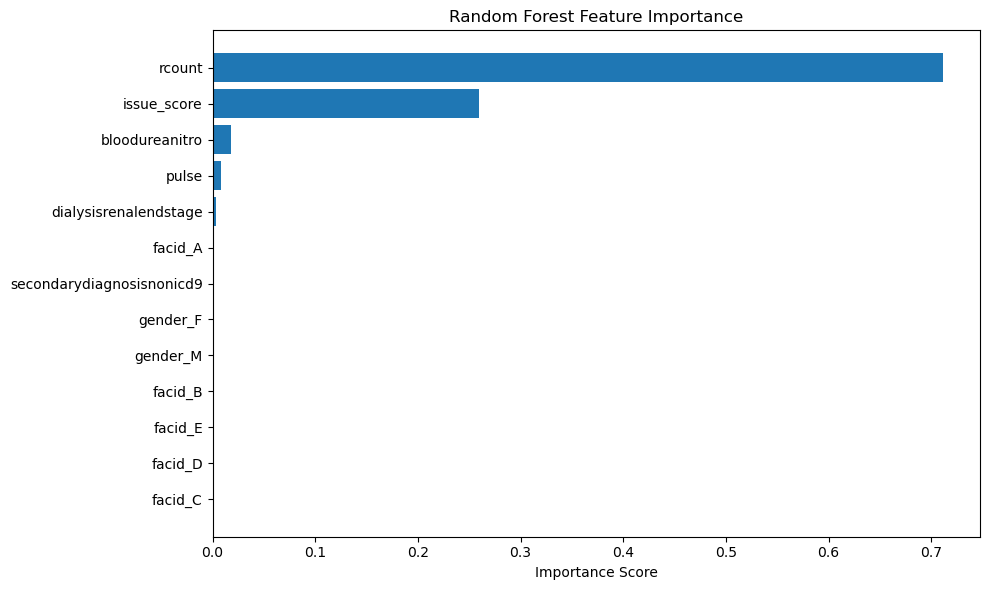

In [47]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'model_rf' is trained Random Forest Regressor
# and 'x_train' is the DataFrame you used for training

# Get feature importances and corresponding feature names
importances = model_rf.feature_importances_
feature_names = x_train.columns

# Create a DataFrame for easy sorting and plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Most important at the top
plt.tight_layout()
plt.show()


In [48]:
print(x_train.columns)

Index(['rcount', 'gender_F', 'gender_M', 'dialysisrenalendstage',
       'bloodureanitro', 'pulse', 'secondarydiagnosisnonicd9', 'facid_B',
       'facid_A', 'facid_E', 'facid_D', 'facid_C', 'issue_score'],
      dtype='object')


In [49]:
print(df.columns)


Index(['rcount', 'gender_F', 'gender_M', 'dialysisrenalendstage',
       'bloodureanitro', 'pulse', 'secondarydiagnosisnonicd9', 'facid_B',
       'facid_A', 'facid_E', 'facid_D', 'facid_C', 'lengthofstay',
       'issue_score'],
      dtype='object')


### XGBoost Regression with Hyperparameter Tuning

We use `XGBRegressor` because:
- It handles **non-linear relationships** and **missing values** well.
- It's often **more accurate** and **faster** than traditional ensemble models like Random Forest, especially with large or complex datasets.
- It offers **regularization (L1, L2)** to prevent overfitting.

### Hyperparameter Tuning (RandomizedSearchCV)

We tune key parameters to find the best model:
- `n_estimators`: Number of boosting rounds (trees)
- `max_depth`: Tree depth (controls complexity)
- `learning_rate`: Step size shrinkage (smaller = slower but more accurate)
- `subsample`: Fraction of training data used per tree (adds randomness, prevents overfitting)
- `colsample_bytree`: Fraction of features used per tree (helps generalization)
- `reg_alpha`, `reg_lambda`: L1 and L2 regularization terms

We use **RandomizedSearchCV** with:
- 30 random parameter combinations
- 3-fold cross-validation
- Scoring metric: **negative RMSE**

### Final Evaluation

The best model is selected and evaluated on the test set using:
- **MAE**: Average absolute error
- **RMSE**: Penalizes large errors more
- **R² Score**: Proportion of variance explained by the model


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np
model_xgb=XGBRegressor(objective='reg:squarederror',random_state=42)
parameters={'n_estimators':[100,200,300,400,500],'max_depth': [5, 6, 7],
'learning_rate': [0.05, 0.01],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 2, 5, 10]}

random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=parameters,
    n_iter=30,              # number of random combinations to try
    scoring='neg_root_mean_squared_error',  
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Step 4: Run the tuning
random_search.fit(x_train, y_train)

# Step 5: Best model evaluation
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(x_test)

# Step 6: Metrics
print("\n Best Parameters:", random_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

### LightGBM Regression with Hyperparameter Tuning

We use `LGBMRegressor` because:
- It's optimized for **speed and memory efficiency**.
- Handles **large datasets** and **high-dimensional data** well.
- Supports **categorical features natively**, though here we're using pre-encoded data.
- Often outperforms other tree-based models on structured/tabular data.

### Hyperparameter Tuning (RandomizedSearchCV)

We tune key parameters to improve model performance:
- `n_estimators`: Number of boosting rounds
- `max_depth`: Controls tree depth (-1 = no limit)
- `learning_rate`: Shrinks contribution of each tree
- `num_leaves`: Number of leaves per tree (controls complexity)
- `subsample`, `colsample_bytree`: Add randomness to prevent overfitting
- `reg_alpha`, `reg_lambda`: L1/L2 regularization terms

Used **RandomizedSearchCV**:
- 30 random combinations
- 3-fold cross-validation
- Scoring metric: Negative Mean Squared Error (`neg_mean_squared_error`)

### Final Evaluation

The best LightGBM model is evaluated on the test set using:
- **MAE**: Mean Absolute Error
- **RMSE**: Root Mean Squared Error
- **R² Score**: Variance explained by the model


In [51]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [-1, 3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 50, 70],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 1, 5]
}

random_search = RandomizedSearchCV(
    estimator=LGBMRegressor(random_state=42),
    param_distributions=param_grid,
    n_iter=30,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)

# Best model
best_lgb = random_search.best_estimator_
y_pred_best = best_lgb.predict(x_test)

# Evaluation
print("Best Parameters:", random_search.best_params_)
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R² Score:", r2_score(y_test, y_pred_best))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 13
[LightGBM] [Info] Start training from score 4.001762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

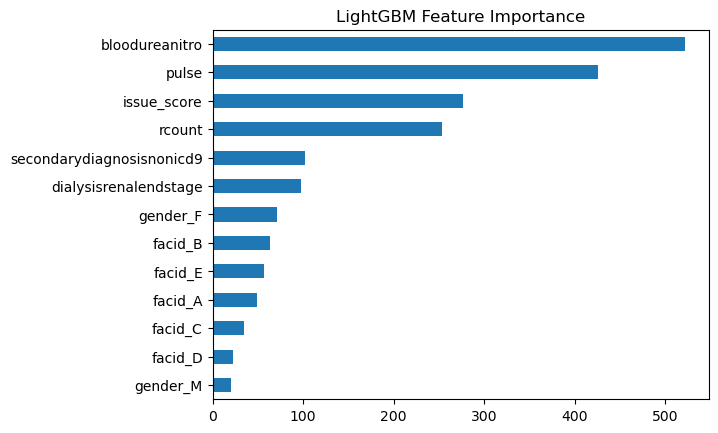

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importance = pd.Series(best_lgb.feature_importances_, index=x_train.columns)
feature_importance.sort_values().tail(20).plot(kind='barh')
plt.title("LightGBM Feature Importance")
plt.show()


In [53]:
# Refit the model on the entire training data with best parameters
final_lgbm = LGBMRegressor(**random_search.best_params_, random_state=42)
final_lgbm.fit(x_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 13
[LightGBM] [Info] Start training from score 4.001762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

,boosting_type,'gbdt'
,num_leaves,70
,max_depth,3
,learning_rate,0.1
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


### SHAP Interpretation for LightGBM

We use SHAP (SHapley Additive exPlanations) to explain the predictions made by the final LightGBM model:

- `shap.Explainer(final_lgbm)` creates a SHAP explainer for the model.
- `explainer(x_train)` computes SHAP values for each feature and instance.
- `shap.summary_plot(...)` visualizes the impact of each feature:
  - Features are ranked by importance.
  - Color shows feature value (red = high, blue = low).
  - Position on x-axis shows effect on the prediction (positive or negative).

This helps us understand **which features most influence the model's predictions**.


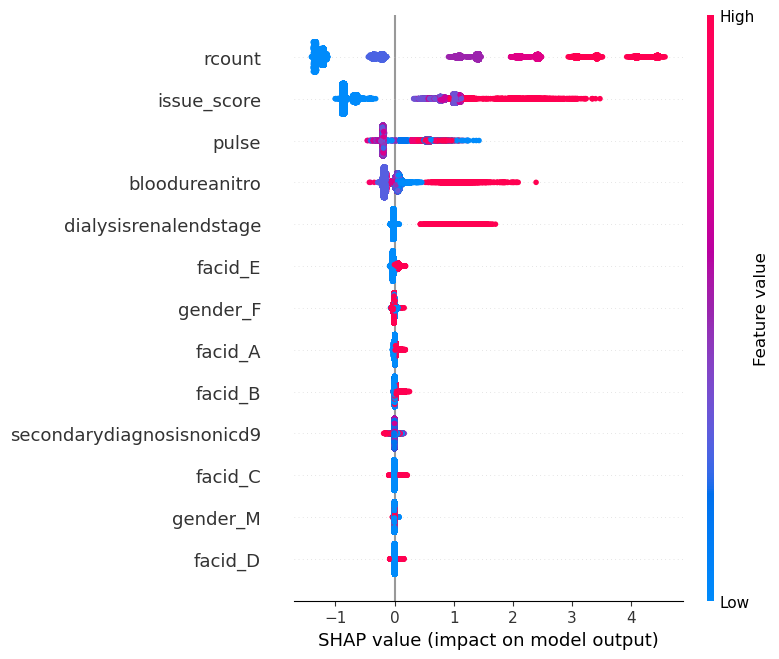

In [54]:
import shap
explainer = shap.Explainer(final_lgbm)
shap_values = explainer(x_train)

# Summary plot
shap.summary_plot(shap_values, x_train)


###  Residual Analysis

- Plotted the **residuals** (actual − predicted) to evaluate model errors.
- A **centered, roughly symmetric** distribution around 0 indicates good model fit.
- The red dashed line at 0 helps visualize bias:
  - If most values are left or right of 0, the model may be under- or over-predicting.
- The **KDE curve** shows how error values are spread — narrow = more accurate, wide = more variance.


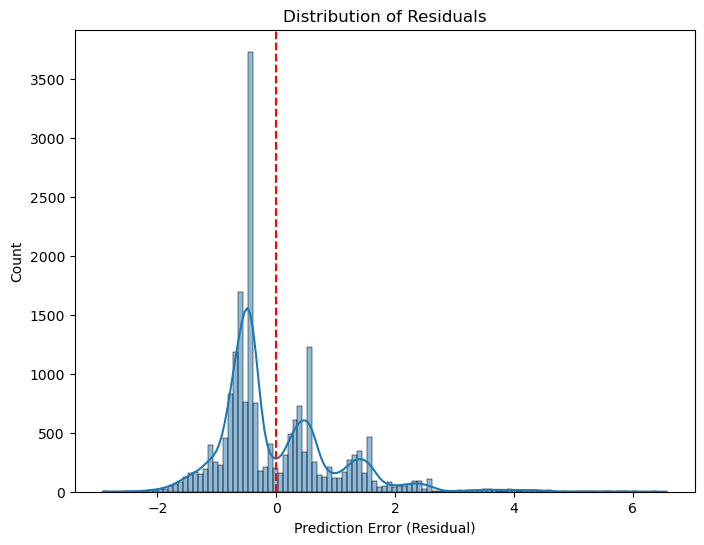

In [55]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Count")
plt.axvline(0, color='r', linestyle='--')
plt.show()
